<a href="https://colab.research.google.com/github/hui509/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BD%9C%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入 `Red Wine Quality` 資料集

In [19]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

# 資料概況

**1. Red Wine Quality 各欄位定義**

* fixed acidity : 非揮發性酸
* volatile acidity : 揮發性酸
* citric acid : 檸檬酸
* residual sugar : 殘留糖分
* chlorides : 氯化物
* free sulfur dioxide : 游離二氧化硫
* total sulfur dioxide : 總二氧化硫
* density : 密度
* pH : pH值
* sulphates : 硫酸鹽
* alcohol : 酒精濃度
* qulity : 品質 (分數介於0 - 10)


**2. 觀察每個「特徵」欄位（除 quality 外）資料的分佈情況**

* 品質越好的紅酒，檸檬酸(citric acid)、硫酸鹽(sulphates)越高。
* 品質越好的紅酒，揮發性酸度(volatile acidity)、氯化物(chlorides)越少。
* 密度(density)對紅酒品質不具有區別性，皆大約為1。
* pH值對紅酒品質區別性也很小，大約落在3左右。




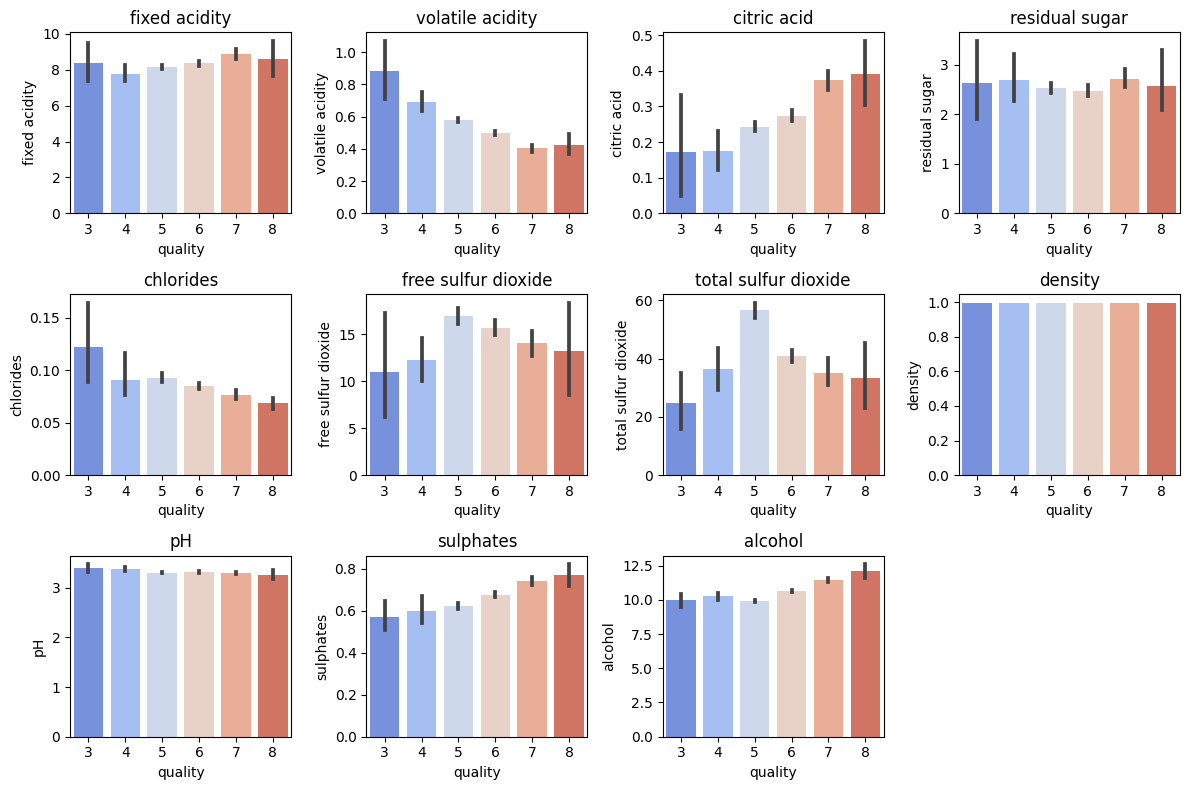

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# 創建一個3x4的圖
fig, axes = plt.subplots(3, 4, figsize=(12, 8))

# 將axes攤平為一維矩陣，以利後續遍歷
axes = axes.flatten()

# 定義資料欄位的索引
column_index = 0

# 長條圖呈現各特徵的分布
for i in df.columns:
  if i != 'quality':
    sns.barplot(data=df, x='quality', y=i, palette='coolwarm', ax=axes[column_index])
    axes[column_index].set_title(i)
    column_index += 1

# 刪除最後一個空白圖表
axes[-1].remove()

# 調整子圖之間的間距
plt.tight_layout()

# 輸出圖表
plt.show()

**3. 觀察每個「標籤」欄位（quality）資料的分佈情況**

* 資料中的 quality 介於3-8分之間。
* 獲得5、6分 quality 的紅酒占多數，共有1319筆。


In [21]:
# 計算不同quality的筆數
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

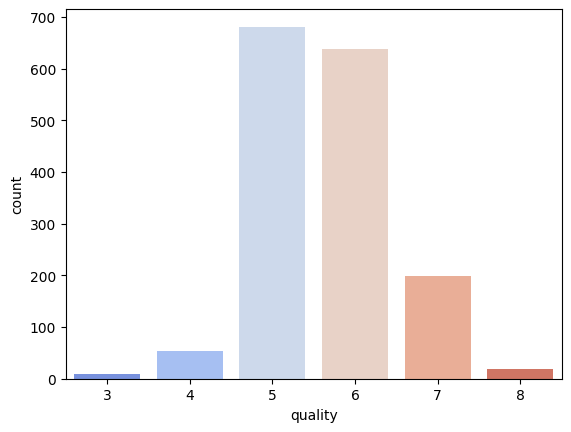

In [22]:
# 計數圖呈現quality的分布
sns.countplot(data=df, x='quality', palette='coolwarm')

**4. 觀察各特徵之間的關係**

* 紅酒品質與酒精濃度(alcohol)有較高的正相關，其次為硫酸鹽(sulphates)和檸檬酸(citric acid)。
* 紅酒品質與揮發性酸度(volatile acidity)有較高的負相關。



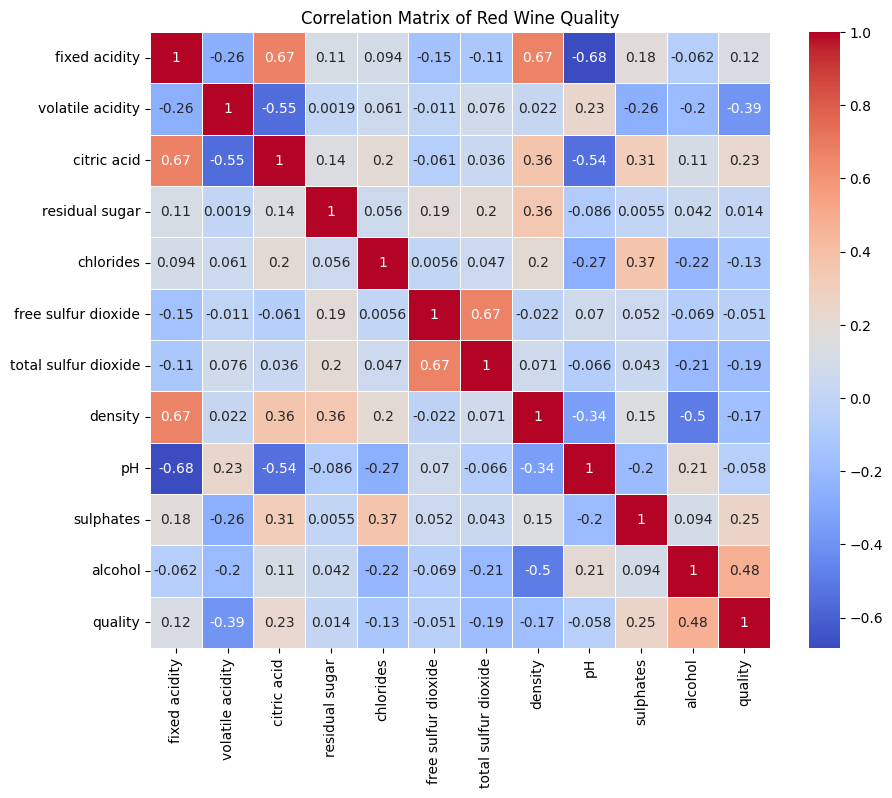

In [23]:
# 計算相關性
cor = df.corr()

# 使用seaborn和matplotlib，視覺化呈現
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,linewidth=0.5,cmap='coolwarm')
plt.title('Correlation Matrix of Red Wine Quality')
plt.show()